In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import gc
import datetime
import glob

now = datetime.datetime.now()
mfbins = np.logspace(np.log10(1e9),np.log10(1e16), 60, endpoint=True)
vfbins = np.logspace(np.log10(1),np.log10(1000), 60, endpoint=True)
vfbins = np.append(vfbins, 2000)


/home/users/dae/demillan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
h5_files = glob.glob('out_35.list*')
h5_files

['out_35.list.p0.hdf5',
 'out_35.list.p1.hdf5',
 'out_35.list.p2.hdf5',
 'out_35.list.p3.hdf5',
 'out_35.list.p4.hdf5',
 'out_35.list.p5.hdf5',
 'out_35.list.p6.hdf5',
 'out_35.list.p7.hdf5']

In [13]:
ymm_hdf5_distinct = np.zeros(len(mfbins) - 1) 
ymm_hdf5_subhalos = np.zeros(len(mfbins) - 1)

yvm_hdf5_distinct = np.zeros(len(vfbins) - 1)
yvm_hdf5_subhalos = np.zeros(len(vfbins) - 1)

filei = 0

for file in h5_files:
    
    print(file)
    
    f = h5py.File(file, 'r')
    
    PID = f['PID'].value    
    Vmax = f['Vmax'].value    
    M200c = f['M200c'].value
    
    pid_distinct_ix = np.where(PID == -1)
    pid_subhalos_ix = np.where(PID > 0)
    
    M200c_distinct_hdf5 = M200c[pid_distinct_ix[0]]
    M200c_subhalos_hdf5 = M200c[pid_subhalos_ix[0]]
    
    vmax_distinct_hdf5 = Vmax[pid_distinct_ix[0]]
    vmax_subhalos_hdf5 = Vmax[pid_subhalos_ix[0]]
    
    ymm_hdf5_distinct_it = np.histogram(M200c_distinct_hdf5, bins = mfbins)[0]
    ymm_hdf5_subhalos_it = np.histogram(M200c_subhalos_hdf5, bins = mfbins)[0]

    yvm_hdf5_distinct_it = np.histogram(vmax_distinct_hdf5, bins = vfbins)[0]
    yvm_hdf5_subhalos_it = np.histogram(vmax_subhalos_hdf5, bins = vfbins)[0]
    
    np.savetxt('mfunc_uchuu_results_hdf5_it_' + str(filei) + '_' + now.strftime(format = '%Y_%m_%d_%H_%M') + '.out', (mfbins[:-1], ymm_hdf5_distinct, ymm_hdf5_subhalos))
    np.savetxt('vfunc_uchuu_results_hdf5_it_' + str(filei) + '_' + now.strftime(format = '%Y_%m_%d_%H_%M') + '.out', (vfbins[:-1], yvm_hdf5_distinct, yvm_hdf5_subhalos))
    
    ymm_hdf5_distinct += ymm_hdf5_distinct_it
    ymm_hdf5_subhalos += ymm_hdf5_subhalos_it

    yvm_hdf5_distinct += yvm_hdf5_distinct_it
    yvm_hdf5_subhalos += yvm_hdf5_subhalos_it
    
    filei += 1
    
np.savetxt('mfunc_uchuu_results_hdf5_all.out', (mfbins[:-1], ymm_hdf5_distinct, ymm_hdf5_subhalos))
np.savetxt('vfunc_uchuu_results_hdf5_all.out', (vfbins[:-1], yvm_hdf5_distinct, yvm_hdf5_subhalos))
    

out_35.list.p0.hdf5
out_35.list.p1.hdf5
out_35.list.p2.hdf5
out_35.list.p3.hdf5
out_35.list.p4.hdf5
out_35.list.p5.hdf5
out_35.list.p6.hdf5
out_35.list.p7.hdf5


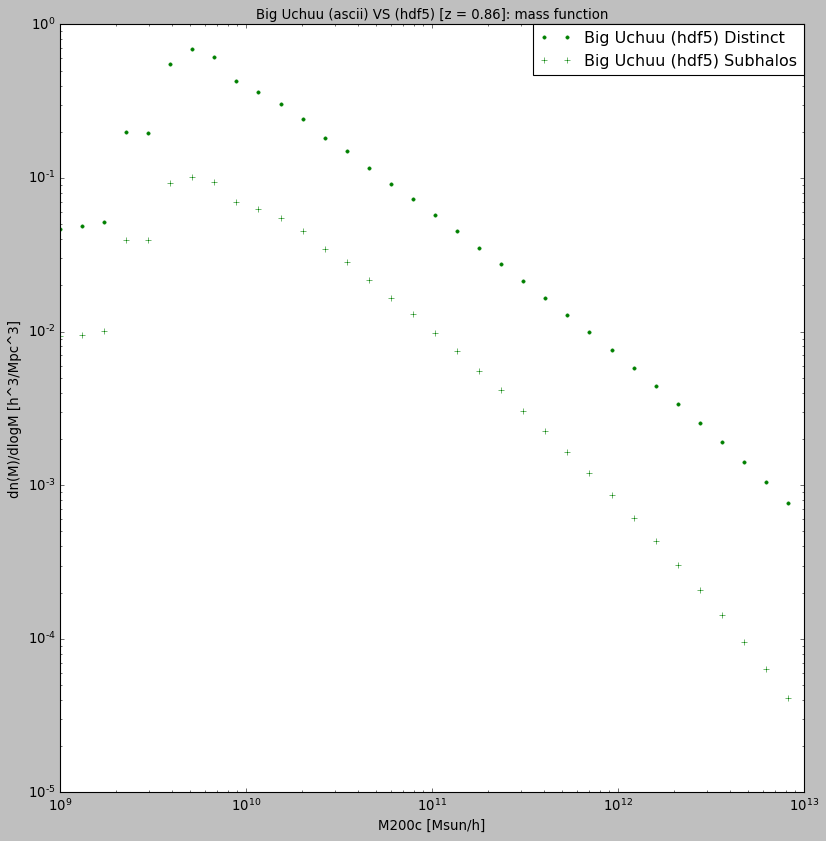

In [16]:
mfbins, ymm_hdf5_distinct, ymm_hdf5_subhalos = np.loadtxt('mfunc_uchuu_results_hdf5_all.out')

norm = 1/(np.log10(mfbins[1:len(mfbins)]) - [np.log10(mfbins[0:(len(mfbins)-1)])])

plt.style.use('classic')
plt.figure(figsize=(12, 12))
plt.plot(mfbins[0:34], norm[0,0]*ymm_hdf5_distinct[0:34]/(2000**3), 'g.', label = "Big Uchuu (hdf5) Distinct")
plt.plot(mfbins[0:34], norm[0,0]*ymm_hdf5_subhalos[0:34]/(2000**3), 'g+', label = "Big Uchuu (hdf5) Subhalos")
plt.title('Big Uchuu (ascii) VS (hdf5) [z = 0.86]: mass function', fontsize = 12)
# plt.vlines(bins[:-1], 10, 40, linestyles = 'dashed', lw=.5)
plt.legend(loc = 1, borderaxespad = 0.)
plt.xlabel('M200c [Msun/h]')
plt.ylabel('dn(M)/dlogM [h^3/Mpc^3]')
plt.xscale('log')
plt.yscale('log')
# plt.show()
plt.savefig("mfunc_ascii_vs_hdf5_biguchuu_z086.png", bbox_inches='tight')


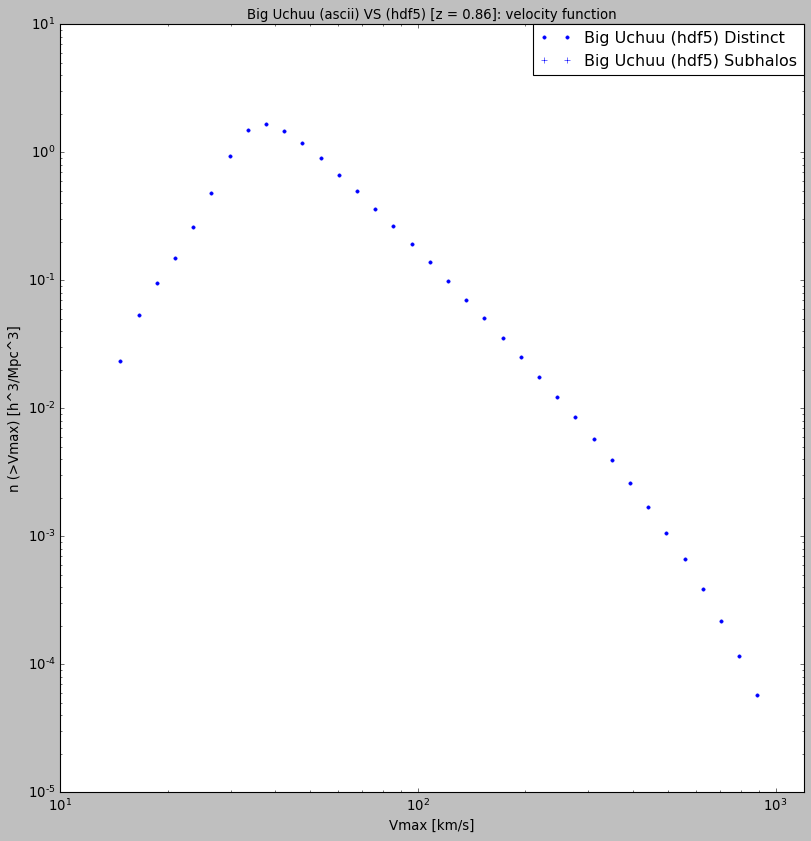

In [15]:
vfbins, yvm_hdf5_distinct, yvm_hdf5_subhalos = np.loadtxt('vfunc_uchuu_results_hdf5_all.out')

norm = 1/(np.log10(vfbins[1:len(vfbins)]) - [np.log10(vfbins[0:(len(vfbins)-1)])])

plt.style.use('classic')
plt.figure(figsize=(12, 12))

plt.plot(vfbins[0:59], norm[0,0]*yvm_hdf5_distinct[0:59]/(2000**3), 'b.', label = "Big Uchuu (hdf5) Distinct")
plt.plot(vfbins[0:59], norm[0,0]*yvm_hdf5_subhalos[0:59]/(2000**3), 'b+', label = "Big Uchuu (hdf5) Subhalos")
plt.title('Big Uchuu (ascii) VS (hdf5) [z = 0.86]: velocity function', fontsize = 12)
# plt.vlines(bins[:-1], 10, 40, linestyles = 'dashed', lw=.5)
plt.legend(loc = 1, borderaxespad = 0.)
plt.xlabel('Vmax [km/s]')
plt.ylabel('n (>Vmax) [h^3/Mpc^3]')
plt.xscale('log')
plt.yscale('log')
plt.xlim([10, 1200])
# plt.show()
plt.savefig("vfunc_ascii_vs_hdf5_biguchuu_z086.png", bbox_inches='tight')
